#SetUp

In [0]:
try:
    %tensorflow_version 2.x
except:
    pass

In [7]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.2.0


#Create a Basic Model of the Form y = mx + c

In [8]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd',
              loss='mean_squared_error')

model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 32.3618
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 25.7838
Epoch 3/200
1/1 [==============================] - 0s 990us/step - loss: 20.6020
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 16.5186
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 13.2997
Epoch 6/200
1/1 [==============================] - 0s 969us/step - loss: 10.7610
Epoch 7/200
1/1 [==============================] - 0s 928us/step - loss: 8.7575
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 7.1753
Epoch 9/200
1/1 [==============================] - 0s 987us/step - loss: 5.9246
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 4.9349
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 4.1506
Epoch 12/200
1/1 [==============================] - 0s 989us/step - loss: 3.5281
Epoch 13/200
1/1 [===========================

#Generate a SavedModel

In [9]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


#Convert the SavedModel to TFLite

In [0]:

# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [16]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

652

#Initialize the TFLite Interpreter To Try It Out

In [0]:

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])


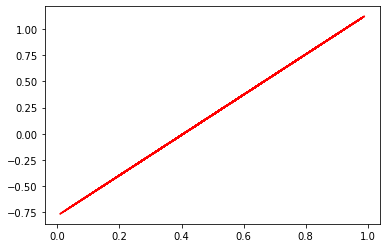

In [13]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()

#Download Model

In [0]:

try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass